In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

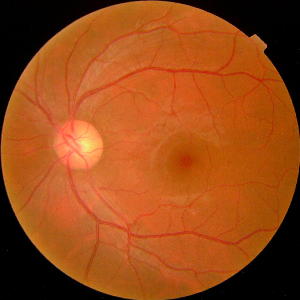

In [38]:
img=cv2.imread('original.png')
cv2_imshow(cv2.resize(img, (300, 300)))

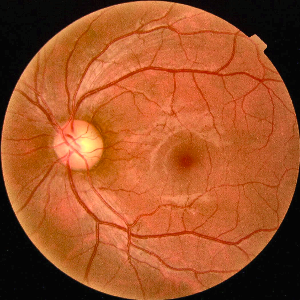

In [60]:
##CLAHE
'''clip_limit=20
clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(5, 5))
l_channel, a_channel, b_channel = cv2.split(img)
cl = clahe.apply(a_channel)
cv2_imshow(cv2.resize(cl, (300, 300)))'''

#CLAHE
def clahe_rgb(image, cliplimit=None, tilesize=8):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=cliplimit,tileGridSize=(tilesize, tilesize))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return rgb

cl=clahe_rgb(img, 2, 8)
cv2_imshow(cv2.resize(cl, (300, 300)))

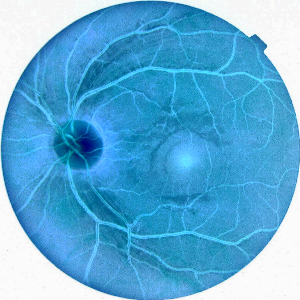

In [61]:
##image inversion
img_not = cv2.bitwise_not(cl)
cv2_imshow(cv2.resize(img_not, (300, 300)))

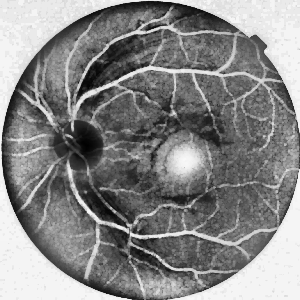

In [41]:
##morphological opening
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(6,6))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
opening = cv2.morphologyEx(img_not, cv2.MORPH_OPEN, kernel)
cv2_imshow(cv2.resize(opening, (300, 300)))

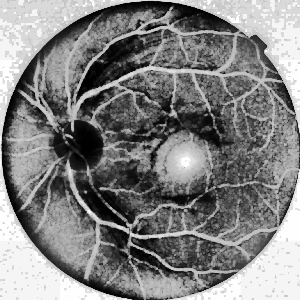

In [42]:
##contrast enhancement
equ = cv2.equalizeHist(opening)
cv2_imshow(cv2.resize(equ, (300, 300)))

In [62]:
#binarization
ret, imgf = cv2.threshold(cl, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(cv2.resize(imgf, (300, 300)))

error: ignored

In [58]:
# import the necessary packages
import numpy as np
import argparse
import cv2

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", help = "path to the image file")
ap.add_argument("-r", "--radius", type = int,help = "radius of Gaussian blur; must be odd")
args = vars(ap.parse_args())

# load the image and convert it to grayscale
image = cv2.imread(args["img"])
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

usage: ipykernel_launcher.py [-h] [-i IMAGE] [-r RADIUS]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-a6c0038d-094c-4b18-a56f-87bbbb1338c7.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
